<a href="https://colab.research.google.com/github/trantoan62/AI-ANN-TranQuocToan/blob/main/3rdDegreesRoboticArm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#l1 = 10, l2 = 40, l3 = 20

In [ ]:
# bài 5: robot 3 bậc tự do như trên + 1 bậc trên oxy, tt1, tt2, tt3 => px, py, góc phi là góc định hướng
# px = l1.c1 + l2.c12 + l3.c123
# px = l1.c1 + l2.c12 + l3.c123
# phi = tt1 + tt2 + tt3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [11]:
l1 = 10
l2 = 40
L3 = 20
px = []
py= []
theta= []
tt1 =[]
tt2 =[]
tt3 =[]

In [12]:
for i in np.arange(0, 360, 5):
    for j in np.arange(0, 360, 5):
      for k in np.arange(0, 360, 5):
              x = l1*np.cos(np.radians(i)) + l2*np.cos(np.radians(i+j)) + L3*np.cos(np.radians(i+j+k))
              y = l1*np.sin(np.radians(i)) + l2*np.sin(np.radians(i+j)) + L3*np.sin(np.radians(i+j+k))
              tt_sum = (i+j+k)%360
              px.append(x)
              py.append(y)
              theta.append(tt_sum)
              tt1.append(i)
              tt2.append(j)
              tt3.append(k)

In [14]:
Px = np.array([px])
Py = np.array([py])
Tt_sum = np.array([theta])
Tt1= np.array([tt1])
Tt2 = np.array([tt2])
Tt3 = np.array([tt3])

In [15]:
Px.shape

(1, 373248)

In [16]:
result = np.concatenate((Tt1.T, Tt2.T, Tt3.T),axis =1)
train = np.concatenate((Px.T, Py.T, Tt_sum.T),axis =1)
result.shape

(373248, 3)

In [17]:
x_train = result[0:261273,:]
y_train = train[0:261273,:]
x_test = result[261273:373248,:]
y_test = train[261273:373248,:]

In [18]:
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(3,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 266,243
Trainable params: 266,243
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss = ['mae'], 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [20]:
history = model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(x_test,y_test))

Epoch 1/200
2042/2042 [==============================] - 10s 4ms/step - loss: 42.8496 - accuracy: 0.8995 - val_loss: 80.0690 - val_accuracy: 0.9074
Epoch 2/200
2042/2042 [==============================] - 9s 4ms/step - loss: 29.5575 - accuracy: 0.9008 - val_loss: 70.7018 - val_accuracy: 0.8611
Epoch 3/200
2042/2042 [==============================] - 12s 6ms/step - loss: 12.3386 - accuracy: 0.9207 - val_loss: 50.4011 - val_accuracy: 0.8697
Epoch 4/200
2042/2042 [==============================] - 8s 4ms/step - loss: 9.4288 - accuracy: 0.9321 - val_loss: 44.9137 - val_accuracy: 0.8851
Epoch 5/200
2042/2042 [==============================] - 8s 4ms/step - loss: 8.3059 - accuracy: 0.9388 - val_loss: 38.4968 - val_accuracy: 0.9239
Epoch 6/200
2042/2042 [==============================] - 7s 4ms/step - loss: 7.6606 - accuracy: 0.9447 - val_loss: 36.9944 - val_accuracy: 0.9201
Epoch 7/200
2042/2042 [==============================] - 8s 4ms/step - loss: 6.6563 - accuracy: 0.9493 - val_loss: 28.4

In [21]:
Score = model.evaluate(x_test,y_test,verbose = 1)

3500/3500 [==============================] - 9s 3ms/step - loss: 18.1878 - accuracy: 0.9365


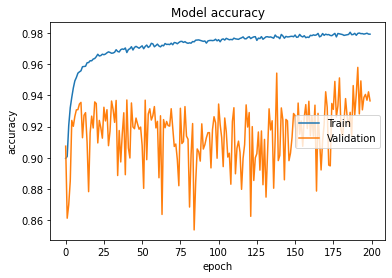

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc ='center right')
plt.show()

In [23]:
model.save('3rdDegreesRoboticArm.h5')

In [25]:
y_pred = model.predict(x_train)